# Select only the trojans from the ATLAS phase fits database

Compare the properties of the L4 and L5 groups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import sys
from astropy.time import Time
from astroquery.jplhorizons import Horizons
from scipy import stats

In [2]:
# DBSCAN clustering of lambda data, see: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
sys.path.append("/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/tools")
import database_tools as dbt
import importlib

In [4]:
importlib.reload(dbt)

<module 'database_tools' from '/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/tools/database_tools.py'>

In [5]:
plt.rcParams.update({'font.size': 16})

In [6]:
mjd_to_jd_shift=2400000.5

In [7]:
# fname="atlas_phase_fits_30_4_2021.csv"
# fname = "atlas_phase_fits_orbs_16_8_2021.csv"
fname = "atlas_phase_fits_orbs_26_8_2021.csv" # contains dophot obs only up to mjd = 59259 (2021-02-14). No orbfit_sep_cut

In [8]:
df_all_data = dbt.load_atlas_phase_fits(fname)

In [9]:
df_all_data

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number,name,orbital_elements_id,...,phase_curve_app_res_range_2M10_o,phase_curve_app_res_range_3M10_c,phase_curve_app_res_range_3M10_o,phase_curve_app_res_range_B89_c,phase_curve_app_res_range_B89_o,phase_curve_app_res_range_P16_c,phase_curve_app_res_range_P16_o,a_semimajor_axis,e_eccentricity,i_inclination_deg
0,2018-06-01 12:18:01,31.0,13.0,18.0,59242.220336,2021-01-15 04:02:43,2021-01-30 02:22:48,1.0,Ceres,1.0,...,0.000000,NaN,NaN,0.220321,0.000000,0.212194,0.000000,2.765655,0.078394,10.588194
1,NaN,24.0,3.0,20.0,59160.239745,2020-05-24 07:16:19,2020-11-09 13:23:01,2.0,Pallas,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.773779,0.229762,34.898597
2,NaN,45.0,20.0,25.0,59300.540000,2021-06-10 03:45:40,2021-06-12 21:05:18,3.0,Juno,3.0,...,0.155523,0.072645,0.166479,0.047789,0.147802,0.053720,0.152937,2.668151,0.256965,12.991481
3,NaN,12.0,7.0,5.0,59233.510382,2021-01-25 00:07:31,2020-03-17 23:04:16,4.0,Vesta,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.361650,0.088349,7.141462
4,2020-10-20 15:12:33,193.0,49.0,141.0,59349.566586,2021-06-16 22:09:32,2021-06-15 21:02:16,5.0,Astraea,5.0,...,0.161659,0.057884,0.139641,0.040578,0.159526,0.040899,0.161641,2.573926,0.190614,5.367602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434034,NaN,10.0,7.0,3.0,59277.428275,2021-06-10 09:40:14,2021-06-11 09:39:22,506906.0,2008 CK194,553711.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.895502,0.061007,19.145688
434035,NaN,15.0,12.0,3.0,59267.395093,2021-06-10 12:11:55,2021-06-10 20:44:26,549516.0,2011 KP48,603135.0,...,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,3.132320,0.111520,9.487708
434036,NaN,18.0,14.0,4.0,59352.314387,2021-06-17 01:11:09,2021-06-17 06:21:32,550221.0,2012 CK5,613285.0,...,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,2.699094,0.290773,13.435809
434037,NaN,18.0,13.0,5.0,59257.465220,2021-06-10 00:23:51,2021-02-03 07:14:23,551041.0,2012 VB7,624230.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.872771,0.067888,17.850431


In [10]:
df_all_data["phase_curve_H_P16_c-o"] = df_all_data["phase_curve_H_P16_c"]-df_all_data["phase_curve_H_P16_o"]
df_all_data["phase_curve_H_B89_c-o"] = df_all_data["phase_curve_H_B89_c"]-df_all_data["phase_curve_H_B89_o"]

SpearmanrResult(correlation=nan, pvalue=nan)
SpearmanrResult(correlation=nan, pvalue=nan)


(0.0, 1.0)

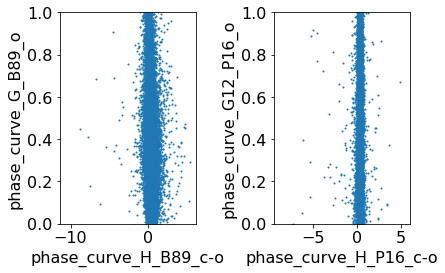

In [11]:
x_plot1 = "phase_curve_H_B89_c-o"
y_plot1 = "phase_curve_G_B89_o"
x_plot2 = "phase_curve_H_P16_c-o"
y_plot2 = "phase_curve_G12_P16_o"

df_plot = df_all_data[(df_all_data["phase_curve_N_fit_B89_o"]>=100)]

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1)
print(stats.spearmanr(df_plot[x_plot1],df_plot[y_plot1]))

ax1.set_xlabel(x_plot1)
ax1.set_ylabel(y_plot1)

ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1)
print(stats.spearmanr(df_plot[x_plot2],df_plot[y_plot2]))

ax2.set_xlabel(x_plot2)
ax2.set_ylabel(y_plot2)

plt.tight_layout()

ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
# ax1.set_xlim(0,1)
# ax2.set_xlim(0,1)

In [12]:
# trim the atlas dataframe?
df=df_all_data
# df=df_cut
# df=df_clipped

# Load the MPCORB trojans

See ~/asteroid_databases/read_mpc.ipynb

Or try use: https://minorplanetcenter.net/iau/lists/JupiterTrojans.html

In [13]:
# df_mpc = dbt.mpcorb_load_unpack_save(save_csv=False,save_path="/Users/jrobinson/asteroid_databases/mpcorb")
df_mpc = dbt.load_mpcorb_db_unpacked()

/Users/jrobinson/miniconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [14]:
df_mpc

,num_des,H_abs_mag,G_slope,epoch,mean_anomaly,arg_perihelion,long_asc_node,i,e,mean_motion,...,N_opps,opp,rms_resid,flags,num_name,date_last_obs,orb_flag,epoch_mjd,name,mpc_number
0,00001,3.53,0.15,K2175,248.40797,73.73770,80.26762,10.58820,0.078394,0.214293,...,120.0,1801-2021,0.51,0000,(1) Ceres,20210128.0,0.0,59400.0,Ceres,1.0
1,00002,4.22,0.15,K2175,230.07779,310.44122,172.91972,34.89867,0.229762,0.213352,...,119.0,1804-2021,0.58,0000,(2) Pallas,20210716.0,0.0,59400.0,Pallas,2.0
2,00003,5.28,0.15,K2175,215.99872,247.99833,169.85216,12.99149,0.256965,0.226146,...,112.0,1804-2021,0.61,0000,(3) Juno,20210709.0,0.0,59400.0,Juno,3.0
3,00004,3.31,0.15,K2175,312.77628,151.01769,103.80605,7.14154,0.088349,0.271569,...,106.0,1821-2021,0.49,0000,(4) Vesta,20210322.0,0.0,59400.0,Vesta,4.0
4,00005,6.99,0.15,K2175,113.33400,358.66063,141.57079,5.36759,0.190614,0.238677,...,83.0,1845-2021,0.71,0000,(5) Astraea,20210708.0,0.0,59400.0,Astraea,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121348,K21GC2U,7.90,0.15,K213R,359.96908,0.12185,198.76661,13.74893,0.012956,0.003482,...,1.0,7 days,0.15,000A,2021 GU122,20210412.0,10.0,59300.0,2021 GU122,NaN
1121349,K21GC2V,8.50,0.15,K213R,359.96416,185.02669,13.19938,17.06006,0.085654,0.004011,...,1.0,7 days,0.21,000A,2021 GV122,20210412.0,10.0,59300.0,2021 GV122,NaN
1121350,K21GC2W,8.10,0.15,K213R,359.96793,67.75883,130.87114,0.50123,0.013471,0.003603,...,1.0,7 days,0.21,000A,2021 GW122,20210412.0,10.0,59300.0,2021 GW122,NaN
1121351,K21H03L,18.90,0.15,K214G,341.42182,97.84464,121.03255,27.28853,0.280549,0.310066,...,1.0,3 days,0.47,0005,2021 HL3,20210502.0,5.0,59320.0,2021 HL3,NaN


In [15]:
# select only the trojans
df_label = df_mpc[df_mpc["orb_flag"]==9]
# calculate mean longitude and arg of perihelion
df_label["lambda"] = (df_label['long_asc_node'] + df_label['arg_perihelion'] + df_label['mean_anomaly']) %360
df_label["ombar"] = (df_label['long_asc_node'] + df_label['arg_perihelion']) % 360

/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
# df_label[np.isnan(df_label["epoch_mjd"])]

# load Jupiter at all trojan epochs

In [17]:
# date_list_jd = np.unique(df_label["epoch_mjd"] + mjd_to_jd_shift)

In [18]:
# date_list_jd

In [19]:
# t1=Time(np.amin(date_list_jd),format="jd")
# t2=Time(np.amax(date_list_jd),format="jd")

In [20]:
# t2-t1

In [21]:
# epoch_list = {'start':t1.iso, 'stop':t2.iso, 'step':'1d'} # a range of epochs in Horizons format is FAST!

In [22]:
# epoch_list

In [23]:
# # obj = Horizons(id=5,id_type="majorbody",epochs=date_list_jd)
# obj = Horizons(id=5,id_type="majorbody",epochs=epoch_list)
# el_J=obj.elements()
# df_J = el_J.to_pandas()
# df_J["lambda_J"]=(df_J['Omega'] + df_J['w'] + df_J['M']) % 360
# df_J["ombar_J"]=(df_J['Omega'] + df_J['w']) %360
# df_J["epoch_mjd"] = df_J["datetime_jd"] - mjd_to_jd_shift

In [24]:
# df_J.to_csv("/Users/jrobinson/asteroid_databases/df_Jupiter_elements.csv")

In [25]:
# df_J=pd.read_csv("/Users/jrobinson/asteroid_databases/df_Jupiter_elements.csv",index_col=0)

In [26]:
# df_label = df_label.merge(df_J[["epoch_mjd","lambda_J","ombar_J"]],on=["epoch_mjd"])

In [27]:
df_label=pd.read_csv("/Users/jrobinson/asteroid_databases/df_trojans_mpc.csv",index_col=0)

In [28]:
df_label

,num_des,H_abs_mag,G_slope,epoch,mean_anomaly,arg_perihelion,long_asc_node,i,e,mean_motion,...,orb_flag,epoch_mjd,name,mpc_number,lambda,ombar,lambda_J,ombar_J,label,trojan_label
0,00588,8.26,0.15,K2175,304.86835,133.40916,316.53681,10.31997,0.147732,0.082902,...,9.0,59400.0,Achilles,588.0,34.81432,89.94597,327.078158,13.908718,0,L4
1,00617,8.23,0.15,K2175,270.07554,307.96472,44.35030,22.05796,0.139545,0.082819,...,9.0,59400.0,Patroclus,617.0,262.39056,352.31502,327.078158,13.908718,1,L5
2,00624,7.32,0.15,K2175,236.87787,182.56882,342.78458,18.15521,0.022558,0.081574,...,9.0,59400.0,Hektor,624.0,42.23127,165.35340,327.078158,13.908718,0,L4
3,00659,8.71,0.15,K2175,48.29448,343.70899,350.73787,4.52245,0.117289,0.083960,...,9.0,59400.0,Nestor,659.0,22.74134,334.44686,327.078158,13.908718,0,L4
4,00884,8.72,0.15,K2175,358.02420,335.69075,301.56290,8.91483,0.124171,0.083412,...,9.0,59400.0,Priamus,884.0,275.27785,277.25365,327.078158,13.908718,1,L5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10531,K19G23B,15.70,0.15,K1947,108.98136,232.14009,201.05001,32.87141,0.173605,0.082053,...,9.0,58580.0,2019 GB23,NaN,182.17146,73.19010,258.982443,14.090028,1,L5
10532,K19G23H,16.40,0.15,K1947,96.11972,88.35955,1.03404,2.33269,0.127384,0.082687,...,9.0,58580.0,2019 GH23,NaN,185.51331,89.39359,258.982443,14.090028,1,L5
10533,K19K06G,14.10,0.15,K196Q,241.13788,159.96057,272.22434,34.62026,0.052374,0.083930,...,9.0,58660.0,2019 KG6,NaN,313.32279,72.18491,265.629003,14.074270,0,L4
10534,K19Q40W,15.40,0.15,K198P,351.50477,194.54910,146.20195,12.15624,0.130699,0.080473,...,9.0,58720.0,2019 QW40,NaN,332.25582,340.75105,270.612600,14.052839,0,L4


# find the trojans by clustering

In [29]:
# x=plt.hist((df_label["lambda"]-df_label["lambda_J"])%360,bins=50)

In [30]:
# X = StandardScaler().fit_transform(np.array((df_label["lambda"]-df_label["lambda_J"])%360).reshape(-1, 1))

In [31]:
# x=plt.hist(X,bins=50)

In [32]:
# # Compute DBSCAN
# db = DBSCAN(eps=0.1, min_samples=100).fit(X)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

In [33]:
# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)

# unique_labels = np.unique(labels)
# N_cluster=len(unique_labels[unique_labels!=-1])
# N_data_cluster = [sum(labels==i) for i in unique_labels] # number of data points in each cluster
# label_max=unique_labels[np.argmax(N_data_cluster)]

In [34]:
# print(labels)
# print(unique_labels)
# print(N_cluster)
# print("number of data points in each cluster = {}".format(N_data_cluster))
# print("label with most data = {}".format(label_max))
# print("number of noise data = {}".format(n_noise_))

In [35]:
# df_label["label"]=labels

In [36]:
# df_label["trojan_label"]=df_label["label"].replace({-1: np.nan, 0:"L4", 1: "L5"})

In [37]:
# df_label.to_csv("/Users/jrobinson/asteroid_databases/df_trojans_mpc.csv")

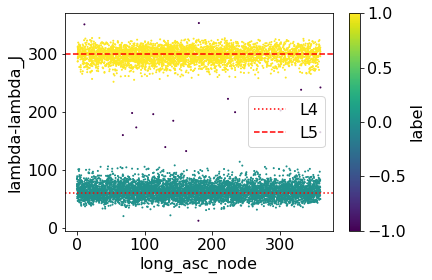

In [38]:
x_plot="long_asc_node"
y_plot1="lambda"
y_plot2="lambda_J"

s1=plt.scatter(df_label[x_plot],(df_label[y_plot1]-df_label[y_plot2])%360,s=1,c=df_label["label"])

cbar1=plt.colorbar(s1)
cbar1.set_label("label")

plt.xlabel(x_plot)
plt.ylabel("{}-{}".format(y_plot1,y_plot2))

plt.axhline(60,c="r",ls=":",label="L4")
plt.axhline(300,c="r",ls="--",label="L5")
plt.legend()

# Merge the MPCORB trojans with the atlas dataframe

In [39]:
df_trojan = df_all_data.merge(df_label,on="name",suffixes=["_1","_2"])

In [40]:
df_trojan

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number_1,name,orbital_elements_id,...,date_last_obs,orb_flag,epoch_mjd,mpc_number_2,lambda,ombar,lambda_J,ombar_J,label,trojan_label
0,2020-10-20 15:12:33,1153.0,291.0,855.0,59377.617894,2021-06-19 17:56:11,2021-06-18 16:32:20,588.0,Achilles,588.0,...,20210803.0,9.0,59400.0,588.0,34.81432,89.94597,327.078158,13.908718,0,L4
1,2020-10-20 15:12:33,1447.0,355.0,1091.0,59385.427963,2021-06-19 19:12:27,2021-06-22 07:18:18,617.0,Patroclus,617.0,...,20210803.0,9.0,59400.0,617.0,262.39056,352.31502,327.078158,13.908718,1,L5
2,2020-10-20 15:12:33,1078.0,268.0,788.0,59267.243519,2021-06-10 00:40:28,2021-06-10 21:06:06,624.0,Hektor,624.0,...,20210724.0,9.0,59400.0,624.0,42.23127,165.35340,327.078158,13.908718,0,L4
3,2020-10-20 15:12:33,1386.0,395.0,958.0,59264.216528,2021-06-09 22:02:40,2021-06-10 14:11:34,659.0,Nestor,659.0,...,20210726.0,9.0,59400.0,659.0,22.74134,334.44686,327.078158,13.908718,0,L4
4,2020-10-20 15:12:33,1353.0,339.0,1013.0,59385.511979,2021-06-20 07:09:48,2021-06-22 07:02:41,884.0,Priamus,884.0,...,20210706.0,9.0,59400.0,884.0,275.27785,277.25365,327.078158,13.908718,1,L5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,NaN,1.0,0.0,1.0,59120.413854,NaN,2020-10-19 12:54:07,490561.0,2009 WY25,490561.0,...,20210211.0,9.0,59400.0,490561.0,36.36721,22.36743,327.078158,13.908718,0,L4
2252,NaN,1.0,0.0,1.0,59115.362164,NaN,2020-10-18 22:23:35,NaN,2009 UO89,572989.0,...,20210710.0,9.0,59400.0,NaN,31.67162,27.76258,327.078158,13.908718,0,L4
2253,NaN,1.0,0.0,1.0,59095.416713,NaN,2020-10-15 10:21:05,NaN,2010 OT83,592037.0,...,20100727.0,9.0,55400.0,NaN,15.37447,15.52736,354.724935,14.484242,0,L4
2254,NaN,5.0,4.0,1.0,59142.303137,2020-10-23 06:30:16,2020-10-13 16:51:45,NaN,2013 BO17,629021.0,...,20190807.0,9.0,59400.0,NaN,28.98952,137.72402,327.078158,13.908718,0,L4


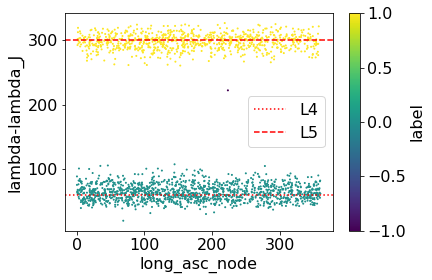

In [41]:
x_plot="long_asc_node"
y_plot1="lambda"
y_plot2="lambda_J"

s1=plt.scatter(df_trojan[x_plot],(df_trojan[y_plot1]-df_trojan[y_plot2])%360,s=1,c=df_trojan["label"])

cbar1=plt.colorbar(s1)
cbar1.set_label("label")

plt.xlabel(x_plot)
plt.ylabel("{}-{}".format(y_plot1,y_plot2))

plt.axhline(60,c="r",ls=":",label="L4")
plt.axhline(300,c="r",ls="--",label="L5")
plt.legend()

In [42]:
df_trojan[df_trojan["label"]==-1]

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number_1,name,orbital_elements_id,...,date_last_obs,orb_flag,epoch_mjd,mpc_number_2,lambda,ombar,lambda_J,ombar_J,label,trojan_label
1768,NaN,56.0,21.0,35.0,59352.281134,2021-06-16 00:21:30,2021-06-17 07:10:40,118624.0,2000 HR24,118624.0,...,20210318.0,9.0,59400.0,118624.0,189.37619,217.32332,327.078158,13.908718,-1,NaN


In [43]:
df_L4=df_trojan[df_trojan["trojan_label"]=="L4"]
df_L5=df_trojan[df_trojan["trojan_label"]=="L5"]

In [44]:
print(len(df_L4))
print(len(df_L5))
print(len(df_L4)/len(df_L5))

1421
834
1.7038369304556356


# select good fits from B89 and P16 models

In [45]:
good_mask_P16_o = ((df_trojan["phase_curve_N_fit_P16_o"]>=100) & 
                      (df_trojan["phase_curve_N_alpha_low_P16_o"]>0) &
                     (df_trojan["phase_curve_G12_err_P16_o"]<=0.2) &
                 (df_trojan["phase_curve_H_err_P16_o"]<=0.05))

In [46]:
good_mask_B89_o = ((df_trojan["phase_curve_N_fit_B89_o"]>=100) & 
                      (df_trojan["phase_curve_N_alpha_low_B89_o"]>0) &
                     (df_trojan["phase_curve_G_err_B89_o"]<=0.2) &
                 (df_trojan["phase_curve_H_err_B89_o"]<=0.05))

In [47]:
df_trojan_P16 = df_trojan[good_mask_P16_o]

In [48]:
df_trojan_B89 = df_trojan[good_mask_B89_o]

In [49]:
good_mask_P16_c = ((df_trojan["phase_curve_N_fit_P16_c"]>=100) & 
                      (df_trojan["phase_curve_N_alpha_low_P16_c"]>0) &
                     (df_trojan["phase_curve_G12_err_P16_c"]<=0.2) &
                 (df_trojan["phase_curve_H_err_P16_c"]<=0.05))

In [50]:
good_mask_B89_c = ((df_trojan["phase_curve_N_fit_B89_c"]>=100) & 
                      (df_trojan["phase_curve_N_alpha_low_B89_c"]>0) &
                     (df_trojan["phase_curve_G_err_B89_c"]<=0.2) &
                 (df_trojan["phase_curve_H_err_B89_c"]<=0.05))

In [51]:
print(len(df_trojan_P16),len(df_trojan_B89))

589 892


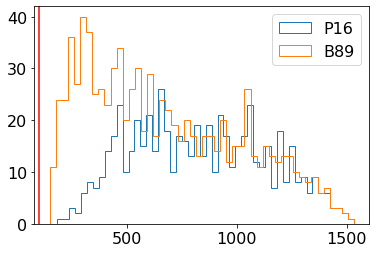

In [52]:
x=plt.hist(df_trojan_P16["detection_count"],histtype="step",bins=50,label="P16")
x=plt.hist(df_trojan_B89["detection_count"],histtype="step",bins=50,label="B89")
plt.axvline(100,c="r")
plt.legend()

In [53]:
print(np.amin(df_trojan_B89["detection_count"]),np.amin(df_trojan_P16["detection_count"]))
print(np.amin(df_trojan_B89["phase_curve_N_fit_B89_o"]),np.amin(df_trojan_P16["phase_curve_N_fit_P16_o"]))

149.0 184.0
100.0 129.0


By implementing error cuts we are increasing the required number of data points to obtain a good fit with the P16 model. The B89 model can still get reasonable fits with ~100 data points

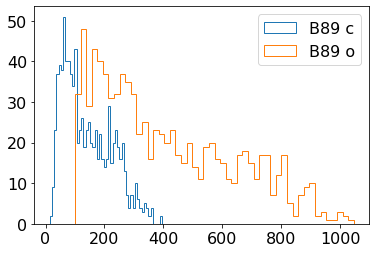

In [54]:
x=plt.hist(df_trojan_B89["phase_curve_N_fit_B89_c"],histtype="step",bins=50,label="B89 c")
x=plt.hist(df_trojan_B89["phase_curve_N_fit_B89_o"],histtype="step",bins=50,label="B89 o")
plt.legend()

The fits in the c filter are not as good as the o fits, there are fewer detections

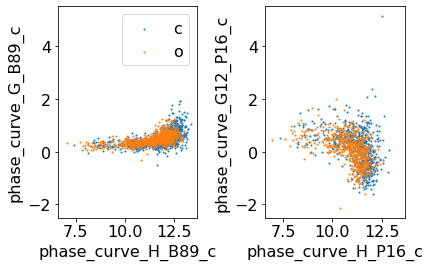

In [55]:
x_plot1 = "phase_curve_H_B89_c"
y_plot1 = "phase_curve_G_B89_c"
_x_plot1 = "phase_curve_H_B89_o"
_y_plot1 = "phase_curve_G_B89_o"
x_plot2 = "phase_curve_H_P16_c"
y_plot2 = "phase_curve_G12_P16_c"
_x_plot2 = "phase_curve_H_P16_o"
_y_plot2 = "phase_curve_G12_P16_o"

df_plot1=df_trojan_B89
df_plot2=df_trojan_P16
# df_plot1 = df_trojan_B89[df_trojan_B89["phase_curve_H_err_B89_c"]<=0.05]
# df_plot2 = df_trojan_P16[df_trojan_P16["phase_curve_H_err_P16_c"]<=0.05]
# df_plot1 = df_trojan[good_mask_B89_o & good_mask_B89_c]
# df_plot2 = df_trojan[good_mask_P16_o & good_mask_P16_c]

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1],sharex=ax1,sharey=ax1)

ax1.scatter(df_plot1[x_plot1],df_plot1[y_plot1],s=1,label="c")
ax1.scatter(df_plot1[_x_plot1],df_plot1[_y_plot1],s=1,label="o")

ax2.scatter(df_plot2[x_plot2],df_plot2[y_plot2],s=1,label="c")
ax2.scatter(df_plot2[_x_plot2],df_plot2[_y_plot2],s=1,label="o")

ax1.set_xlabel(x_plot1)
ax1.set_ylabel(y_plot1)
ax2.set_xlabel(x_plot2)
ax2.set_ylabel(y_plot2)

plt.tight_layout()
ax1.legend()

The B89 model has more fits for smaller objects (H>~12). G_B89 increases for smaller objects

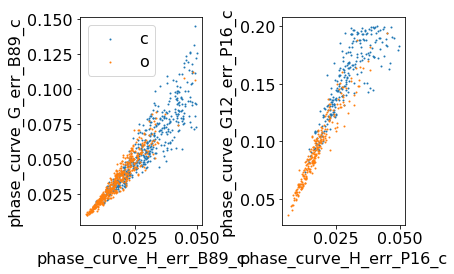

In [56]:
x_plot1 = "phase_curve_H_err_B89_c"
y_plot1 = "phase_curve_G_err_B89_c"
_x_plot1 = "phase_curve_H_err_B89_o"
_y_plot1 = "phase_curve_G_err_B89_o"
x_plot2 = "phase_curve_H_err_P16_c"
y_plot2 = "phase_curve_G12_err_P16_c"
_x_plot2 = "phase_curve_H_err_P16_o"
_y_plot2 = "phase_curve_G12_err_P16_o"

# df_plot1=df_trojan_B89
# df_plot2=df_trojan_P16
# df_plot1 = df_trojan_B89[df_trojan_B89["phase_curve_H_err_B89_c"]<=0.05]
# df_plot2 = df_trojan_P16[df_trojan_P16["phase_curve_H_err_P16_c"]<=0.05]
df_plot1 = df_trojan[good_mask_B89_o & good_mask_B89_c]
df_plot2 = df_trojan[good_mask_P16_o & good_mask_P16_c]

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])#,sharex=ax1,sharey=ax1)

ax1.scatter(df_plot1[x_plot1],df_plot1[y_plot1],s=1,label="c")
ax1.scatter(df_plot1[_x_plot1],df_plot1[_y_plot1],s=1,label="o")

ax2.scatter(df_plot2[x_plot2],df_plot2[y_plot2],s=1,label="c")
ax2.scatter(df_plot2[_x_plot2],df_plot2[_y_plot2],s=1,label="o")

ax1.set_xlabel(x_plot1)
ax1.set_ylabel(y_plot1)
ax2.set_xlabel(x_plot2)
ax2.set_ylabel(y_plot2)

plt.tight_layout()
ax1.legend()

When we select only fits that are good in both o and c, we can see that the c filter fits are generally lower quality, especially for the P16 model

# look at colours

466 247
SpearmanrResult(correlation=-0.1627355120434527, pvalue=0.0004201681888376814)
SpearmanrResult(correlation=-0.16679391493792825, pvalue=0.008626818034675382)


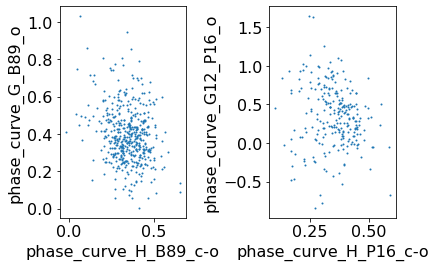

In [57]:
x_plot1 = "phase_curve_H_B89_c-o"
y_plot1 = "phase_curve_G_B89_o"
x_plot2 = "phase_curve_H_P16_c-o"
y_plot2 = "phase_curve_G12_P16_o"

# df_plot1 = df_trojan_B89[df_trojan_B89["phase_curve_H_err_B89_c"]<=0.05]
# df_plot2 = df_trojan_P16[df_trojan_P16["phase_curve_H_err_P16_c"]<=0.05]
df_plot1 = df_trojan[good_mask_B89_o & good_mask_B89_c]
df_plot2 = df_trojan[good_mask_P16_o & good_mask_P16_c]
print(len(df_plot1),len(df_plot2))

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

ax1.scatter(df_plot1[x_plot1],df_plot1[y_plot1],s=1)
print(stats.spearmanr(df_plot1[x_plot1],df_plot1[y_plot1]))

# ax1.scatter(df_plot1["phase_curve_H_B89_o"]-df_plot1["phase_curve_H_B89_c"],df_plot1[y_plot1],s=1)
# print(stats.spearmanr(df_plot1["phase_curve_H_B89_o"]-df_plot1["phase_curve_H_B89_c"],df_plot1[y_plot1]))

ax1.set_xlabel(x_plot1)
ax1.set_ylabel(y_plot1)

ax2.scatter(df_plot2[x_plot2],df_plot2[y_plot2],s=1)
print(stats.spearmanr(df_plot2[x_plot2],df_plot2[y_plot2]))

ax2.set_xlabel(x_plot2)
ax2.set_ylabel(y_plot2)

plt.tight_layout()

# ax1.set_ylim(0,1)
# ax2.set_ylim(0,1)
# ax1.set_xlim(0,1)
# ax2.set_xlim(0,1)

Note that G B89 and G12 P16 are approximately inversely proportional

Text(0, 0.5, 'phase_curve_G12_P16_o')

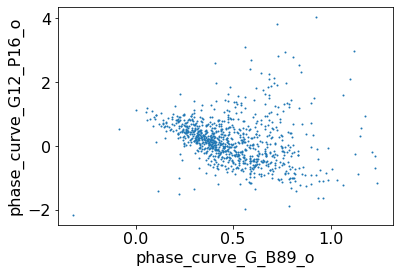

In [58]:
x_plot = "phase_curve_G_B89_o"
y_plot = "phase_curve_G12_P16_o"

df_plot=df_trojan_B89

plt.scatter(df_plot[x_plot],df_plot[y_plot],s=1)

plt.xlabel(x_plot)
plt.ylabel(y_plot)

# plt.xlim(0,1)
# plt.ylim(0,1)

In [59]:
df_plot1[["name","mpc_number_1"]]

,name,mpc_number_1
0,Achilles,588.0
1,Patroclus,617.0
2,Hektor,624.0
3,Nestor,659.0
4,Priamus,884.0
...,...,...
999,2000 BT24,134749.0
1088,2004 HB27,164208.0
1199,2007 RZ281,192222.0
1248,2007 PH37,200029.0


466 247


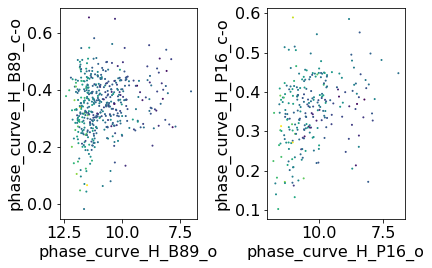

In [60]:
y_plot1 = "phase_curve_H_B89_c-o"
x_plot1 = "phase_curve_H_B89_o"
y_plot2 = "phase_curve_H_P16_c-o"
x_plot2 = "phase_curve_H_P16_o"
c_plot1 = "phase_curve_G_B89_o"
c_plot2 = "phase_curve_G12_P16_o"

# df_plot1 = df_trojan_B89[df_trojan_B89["phase_curve_H_err_B89_c"]<=0.05]
# df_plot2 = df_trojan_P16[df_trojan_P16["phase_curve_H_err_P16_c"]<=0.05]
df_plot1 = df_trojan[good_mask_B89_o & good_mask_B89_c]
df_plot2 = df_trojan[good_mask_P16_o & good_mask_P16_c]
print(len(df_plot1),len(df_plot2))

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

ax1.scatter(df_plot1[x_plot1],df_plot1[y_plot1],s=1,c=df_plot1[c_plot1])

ax1.set_xlabel(x_plot1)
ax1.set_ylabel(y_plot1)

ax2.scatter(df_plot2[x_plot2],df_plot2[y_plot2],s=1,c=df_plot2[c_plot1])

ax2.set_xlabel(x_plot2)
ax2.set_ylabel(y_plot2)

ax1.invert_xaxis()
ax2.invert_xaxis()

plt.tight_layout()

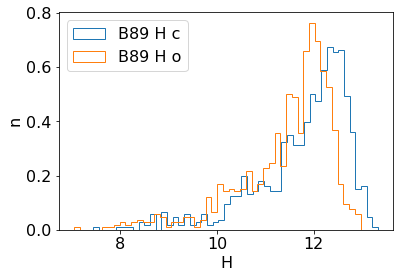

In [61]:
x_plot1 = "phase_curve_H_B89_c"
x_plot2 = "phase_curve_H_B89_o"

df_plot=df_trojan_B89

x=plt.hist(df_plot[x_plot1],histtype="step",bins=50,label="B89 H c",density=True)
x=plt.hist(df_plot[x_plot2],histtype="step",bins=50,label="B89 H o",density=True)

plt.xlabel("H")
plt.ylabel("n")

plt.legend(loc="upper left")

Text(0, 0.5, 'phase_curve_H_B89_c')

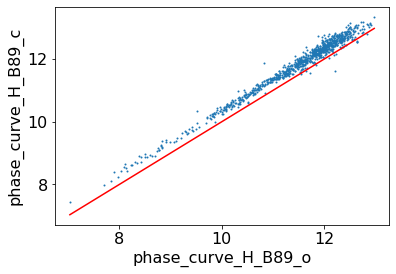

In [62]:
x_plot = "phase_curve_H_B89_o"
y_plot = "phase_curve_H_B89_c"

df_plot=df_trojan_B89
# df_plot = df_trojan[good_mask_B89_o & good_mask_B89_c]

plt.scatter(df_plot[x_plot],df_plot[y_plot],s=1)

plt.plot([np.amin(df_plot[x_plot]),np.amax(df_plot[x_plot])],
        [np.amin(df_plot[x_plot]),np.amax(df_plot[x_plot])],
        c="r")

plt.xlabel(x_plot)
plt.ylabel(y_plot)

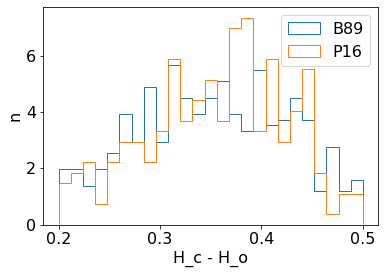

In [63]:
x_plot1 = "phase_curve_H_B89_c-o"
x_plot2 = "phase_curve_H_P16_c-o"

# df_plot1=df_trojan_B89
# df_plot2=df_trojan_P16
df_plot1 = df_trojan[good_mask_B89_o & good_mask_B89_c]
df_plot2 = df_trojan[good_mask_P16_o & good_mask_P16_c]

x=plt.hist(df_plot1[x_plot1],histtype="step",bins=25,label="B89",density=True,range=(0.2,0.5))
x=plt.hist(df_plot2[x_plot2],histtype="step",bins=25,label="P16",density=True,range=(0.2,0.5))

plt.xlabel("H_c - H_o")
plt.ylabel("n")

plt.legend()

# Compare to Schemel 2021 dataset

In [64]:
df_schemel = dbt.load_schemel_db()

In [65]:
df_schemel = df_schemel.merge(df_all_data,left_on="Asteroid number",right_on="mpc_number")

In [66]:
len(df_schemel)

1043

In [67]:
df_schemel = df_schemel.merge(df_label[["mpc_number","trojan_label"]],on="mpc_number")

In [68]:
list(df_schemel)

['Asteroid number',
 'Average absolute r band magnitude',
 'Lower uncertainty in Hr',
 'Upper uncertainty in Hr',
 'Single phase parameter',
 'Lower uncertainty in G',
 'Upper uncertainty in G',
 'The (g-r) color',
 'Lower uncertainty in g-r',
 'Upper uncertainty in g-r',
 '? 2019 offset magnitude from 2018 average magnitude',
 '? Lower uncertainty in off1',
 '? Upper uncertainty in off1',
 '? 2019 offset magnitude from 2020 average magnitude',
 '? Lower uncertainty in off3',
 '? Upper uncertainty in off3',
 'Limit flag on A1',
 '? 2018 rotational amplitude',
 '? Lower uncertainty in A1',
 '? Upper uncertainty in A1',
 'Limit flag on A2',
 '? 2019 rotational amplitude',
 '? Lower uncertainty in A2',
 '? Upper uncertainty in A2',
 'Limit flag on A3',
 '? 2020 rotational amplitude',
 '? Lower uncertainty in A3',
 '? Upper uncertainty in A3',
 'Limit flag on f',
 'Fraction of outliers',
 '? Lower uncertainty in f',
 '? Upper uncertainty in f',
 'dateLastModified',
 'detection_count',
 'de

Some ATLAS objects do not have a successful fit, but the ZTF fits are good

In [69]:
mask = (np.isnan(df_schemel["phase_curve_H_B89_o"]) | np.isnan(df_schemel["phase_curve_G_B89_o"]))
df_schemel[mask]

,Asteroid number,Average absolute r band magnitude,Lower uncertainty in Hr,Upper uncertainty in Hr,Single phase parameter,Lower uncertainty in G,Upper uncertainty in G,The (g-r) color,Lower uncertainty in g-r,Upper uncertainty in g-r,...,phase_curve_app_res_range_B89_c,phase_curve_app_res_range_B89_o,phase_curve_app_res_range_P16_c,phase_curve_app_res_range_P16_o,a_semimajor_axis,e_eccentricity,i_inclination_deg,phase_curve_H_P16_c-o,phase_curve_H_B89_c-o,trojan_label
831,188846,13.43,0.30,0.29,0.18,0.36,0.36,0.69,0.08,0.10,...,NaN,NaN,NaN,NaN,5.171204,0.015220,11.274834,NaN,NaN,L5
917,215110,12.88,0.27,0.26,0.29,0.40,0.41,0.57,0.15,0.17,...,NaN,NaN,NaN,NaN,5.187328,0.105679,25.200121,NaN,NaN,L5
964,249476,12.51,0.24,0.26,0.33,0.37,0.37,0.56,0.13,0.16,...,NaN,NaN,NaN,NaN,5.153866,0.053080,32.840971,NaN,NaN,L5
987,291557,13.06,0.24,0.24,0.36,0.37,0.37,0.54,0.14,0.16,...,NaN,NaN,NaN,NaN,5.159130,0.069091,24.290446,NaN,NaN,L5
1013,312766,13.30,0.28,0.26,0.43,0.38,0.38,0.60,0.15,0.16,...,NaN,NaN,NaN,NaN,5.228254,0.019029,17.108275,NaN,NaN,L4
1038,427346,12.74,0.25,0.25,0.40,0.39,0.40,0.57,0.14,0.17,...,NaN,NaN,NaN,NaN,5.193477,0.068230,33.093560,NaN,NaN,L5
1040,436204,13.52,0.29,0.29,0.40,0.36,0.38,0.56,0.15,0.17,...,NaN,NaN,NaN,NaN,5.205012,0.055237,16.818273,NaN,NaN,L4


In [70]:
df_schemel = df_schemel[~mask]

Select the good fits in o and c

In [71]:
good_o = ((df_schemel["phase_curve_N_fit_B89_o"]>=100) & 
                      (df_schemel["phase_curve_N_alpha_low_B89_o"]>0) &
                     (df_schemel["phase_curve_G_err_B89_o"]<=0.2) &
                 (df_schemel["phase_curve_H_err_B89_o"]<=0.05))

In [72]:
good_c = ((df_schemel["phase_curve_N_fit_B89_c"]>=100) & 
                      (df_schemel["phase_curve_N_alpha_low_B89_c"]>0) &
                     (df_schemel["phase_curve_G_err_B89_c"]<=0.2) &
                 (df_schemel["phase_curve_H_err_B89_c"]<=0.05))

In [73]:
good_o_c = (good_o & good_c)

SpearmanrResult(correlation=0.9373338168720244, pvalue=0.0)
SpearmanrResult(correlation=0.9900762843833887, pvalue=3.90727e-319)
SpearmanrResult(correlation=0.09524066859740445, pvalue=0.0021493167284878153)
SpearmanrResult(correlation=0.2006108530872379, pvalue=9.367119130857658e-05)


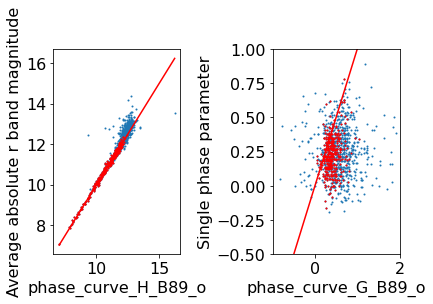

In [74]:
x_plot1 = "phase_curve_H_B89_o"
y_plot1 = "Average absolute r band magnitude"
x_plot2 = "phase_curve_G_B89_o"
y_plot2 = "Single phase parameter"

df_plot = df_schemel
df_plot2 = df_schemel[good_o_c]

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1)
print(stats.spearmanr(df_plot[x_plot1],df_plot[y_plot1]))

ax1.scatter(df_plot2[x_plot1],df_plot2[y_plot1],s=1,c="r")
print(stats.spearmanr(df_plot2[x_plot1],df_plot2[y_plot1]))

ax1.plot([np.amin(df_plot[x_plot1]),np.amax(df_plot[x_plot1])],
        [np.amin(df_plot[x_plot1]),np.amax(df_plot[x_plot1])],
        c="r")

ax1.set_xlabel(x_plot1)
ax1.set_ylabel(y_plot1)

ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1)
print(stats.spearmanr(df_plot[x_plot2],df_plot[y_plot2]))

ax2.scatter(df_plot2[x_plot2],df_plot2[y_plot2],s=1,c="r")
print(stats.spearmanr(df_plot2[x_plot2],df_plot2[y_plot2]))

ax2.plot([np.amin(df_plot[x_plot2]),np.amax(df_plot[x_plot2])],
        [np.amin(df_plot[x_plot2]),np.amax(df_plot[x_plot2])],
        c="r")

ax2.set_xlabel(x_plot2)
ax2.set_ylabel(y_plot2)

# ax2.set_xlim(-1,2)
ax2.set_ylim(-0.5,1)
ax2.set_xlim(-1,2)
# ax2.set_ylim(0,1)
# ax2.set_xlim(0,1)

plt.tight_layout()

The measured absolute mag is generally in good agreement. The measured G values are only in agreement when the ATLAS fit is good in both o and c filters

SpearmanrResult(correlation=nan, pvalue=nan)
SpearmanrResult(correlation=0.4280670409767106, pvalue=4.258592557547586e-18)


(0.3, 0.8)

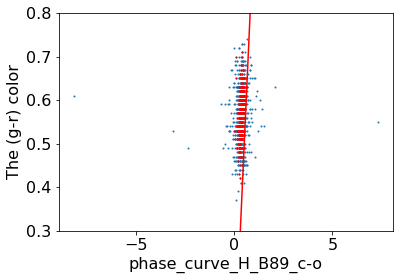

In [75]:
x_plot="phase_curve_H_B89_c-o"
y_plot="The (g-r) color"

df_plot = df_schemel
df_plot2 = df_schemel[good_o_c]

plt.plot([np.amin(df_plot[x_plot]),np.amax(df_plot[x_plot])],
        [np.amin(df_plot[x_plot]),np.amax(df_plot[x_plot])],
        c="r")

plt.scatter(df_plot[x_plot],df_plot[y_plot],s=1)
print(stats.spearmanr(df_plot[x_plot],df_plot[y_plot]))

plt.scatter(df_plot2[x_plot],df_plot2[y_plot],s=1,c="r")
print(stats.spearmanr(df_plot2[x_plot],df_plot2[y_plot]))

plt.xlabel(x_plot)
plt.ylabel(y_plot)

# plt.xlim(0,1)
plt.ylim(0.3,0.8)

The colours are in general agreement, however the best match is again when ATLAS has good fits in both o and c

median colour difference: 0.22385000000000022


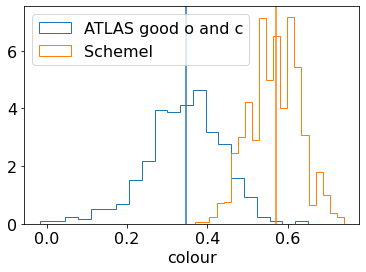

In [76]:
x_plot1="phase_curve_H_B89_c-o"
x_plot2="The (g-r) color"

df_plot = df_schemel
df_plot2 = df_schemel[good_o_c]

plt.hist(df_plot2[x_plot],density=True,histtype="step",bins="auto",label="ATLAS good o and c")
plt.hist(df_plot[x_plot2],density=True,histtype="step",bins="auto",label="Schemel")

plt.axvline(np.median(df_plot2[x_plot]),c="C0")
plt.axvline(np.median(df_plot[x_plot2]),c="C1")

print("median colour difference: {}".format(np.median(df_plot[x_plot2]) - np.median(df_plot2[x_plot])))
                      
plt.xlabel("colour")
plt.legend()

Text(0, 0.5, 'PDF')

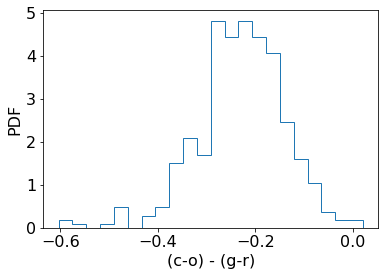

In [77]:
x_plot1 = "phase_curve_H_B89_c-o"
x_plot2 = "The (g-r) color"

# df_plot=df_schemel
df_plot = df_schemel[good_o_c]

x=plt.hist(df_plot[x_plot1]-df_plot[x_plot2],histtype="step",bins="auto",density=True)

plt.xlabel("(c-o) - (g-r)")
plt.ylabel("PDF")

# plt.xlim(-1,1)


Does schemel colour data show any differences between L4 and L5?

613 423 1.4491725768321513
g-r (L4) = 0.56+/-0.0025084176676448988
g-r (L5) = 0.58+/-0.0028781781909302303


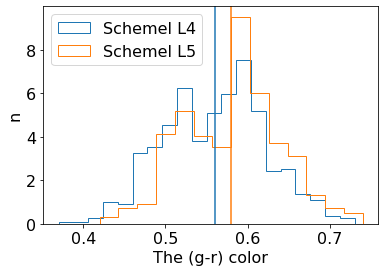

In [78]:
x_plot = "The (g-r) color"

df_plot1 = df_schemel[df_schemel["trojan_label"]=="L4"]
df_plot2 = df_schemel[df_schemel["trojan_label"]=="L5"]

print(len(df_plot1),len(df_plot2),len(df_plot1)/len(df_plot2))

x=plt.hist(df_plot1[x_plot],histtype="step",bins="auto",label="Schemel L4",density=True)
x=plt.hist(df_plot2[x_plot],histtype="step",bins="auto",label="Schemel L5",density=True)

plt.xlabel(x_plot)
plt.ylabel("n")

plt.axvline(np.median(df_plot1[x_plot]),c="C0")
plt.axvline(np.median(df_plot2[x_plot]),c="C1")

standard_error1 = np.std(df_plot1[x_plot])/np.sqrt(len(df_plot1[x_plot]))
standard_error2 = np.std(df_plot2[x_plot])/np.sqrt(len(df_plot2[x_plot]))

print("g-r (L4) = {}+/-{}".format(np.median(df_plot1[x_plot]),standard_error1))
print("g-r (L5) = {}+/-{}".format(np.median(df_plot2[x_plot]),standard_error2))

plt.legend()

note the colour bimodality

KstestResult(statistic=0.15538432465994856, pvalue=9.505122281150413e-06)


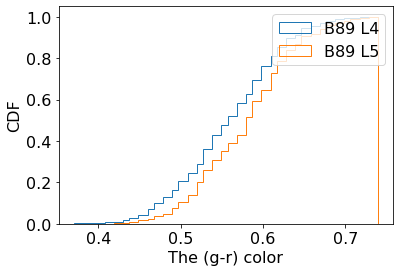

In [79]:
ks_check = "The (g-r) color"

df_plot1 = df_schemel[df_schemel["trojan_label"]=="L4"]
df_plot2 = df_schemel[df_schemel["trojan_label"]=="L5"]

x1=df_plot1[ks_check]
x2=df_plot2[ks_check]

bins=np.linspace(np.amin([np.amin(x1),np.amin(x2)]),np.amax([np.amax(x1),np.amax(x2)]),100)
x=plt.hist(x1, density=True, cumulative=True, histtype='step',bins=bins,label="B89 L4")
x=plt.hist(x2, density=True, cumulative=True, histtype='step',bins=bins,label="B89 L5")
plt.xlabel(ks_check)
plt.ylabel("CDF")
plt.legend()

print(stats.ks_2samp(x1,x2))

Schemel and McNeill data sets both show different colour dists for the L4 and L5 clouds.
Schemel data appears to agree with our findings that the L5 is generally redder than the L4, opposite to McNeill (see below).

# search for rotation/apparition effects

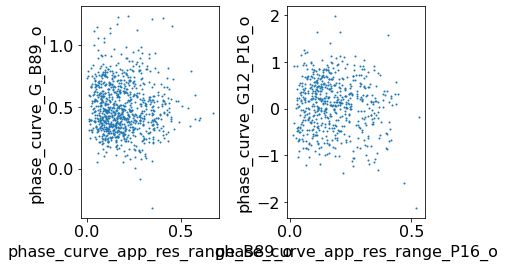

In [80]:
# x_plot1 = "phase_curve_app_res_std_B89_o"
# y_plot1 = "phase_curve_app_res_range_B89_o"
# x_plot2 = "phase_curve_app_res_std_P16_o"
# y_plot2 = "phase_curve_app_res_range_P16_o"

# x_plot1 = "phase_curve_app_res_std_B89_o"
# y_plot1 = "phase_curve_G_B89_o"
# x_plot2 = "phase_curve_app_res_std_P16_o"
# y_plot2 = "phase_curve_G12_P16_o"

x_plot1 = "phase_curve_app_res_range_B89_o"
y_plot1 = "phase_curve_G_B89_o"
x_plot2 = "phase_curve_app_res_range_P16_o"
y_plot2 = "phase_curve_G12_P16_o"

df_plot1 = df_trojan_B89
df_plot2 = df_trojan_P16

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

ax1.scatter(df_plot1[x_plot1],df_plot1[y_plot1],s=1)

ax1.set_xlabel(x_plot1)
ax1.set_ylabel(y_plot1)

ax2.scatter(df_plot2[x_plot2],df_plot2[y_plot2],s=1)

ax2.set_xlabel(x_plot2)
ax2.set_ylabel(y_plot2)

plt.tight_layout()

# ax1.set_ylim(0,1)
# ax2.set_ylim(0,1)
# ax1.set_xlim(0,1)
# ax2.set_xlim(0,1)

In [81]:
df_trojan_B89[df_trojan_B89["phase_curve_app_res_std_B89_o"]>0.2][[
    "name","phase_curve_N_fit_B89_o","phase_curve_app_res_std_B89_o"
]].sort_values("phase_curve_app_res_std_B89_o")

,name,phase_curve_N_fit_B89_o,phase_curve_app_res_std_B89_o
1181,2002 CZ80,134.0,0.207829
824,2002 GE39,304.0,0.211373
605,2000 QA127,206.0,0.211699
1084,2002 GU35,200.0,0.212233
965,2003 FO111,135.0,0.215995
507,1996 RK29,416.0,0.217691
403,2001 DC102,167.0,0.223582
536,2001 BK9,247.0,0.241864
650,2000 SR284,183.0,0.247663
518,1999 XP199,132.0,0.250351


Search for objects with large numbers of data points, but high fit errors

In [82]:
df_trojan[(df_trojan["phase_curve_N_fit_B89_o"]>=100) &
         (df_trojan["phase_curve_H_err_B89_o"]>0.05)].sort_values("phase_curve_H_err_B89_o")[[
    "name","phase_curve_N_fit_B89_o","phase_curve_H_err_B89_o"
]]

,name,phase_curve_N_fit_B89_o,phase_curve_H_err_B89_o
1632,2009 TD6,129.0,0.050192
430,1988 SJ3,176.0,0.050218
980,1997 SV14,100.0,0.050656
886,1998 XT1,317.0,0.050704
1265,2007 RC286,173.0,0.050880
...,...,...,...
935,2004 YD23,136.0,0.103056
795,2000 SA182,179.0,0.127792
1160,2008 EP68,168.0,0.132842
1466,2010 PY65,108.0,0.145813


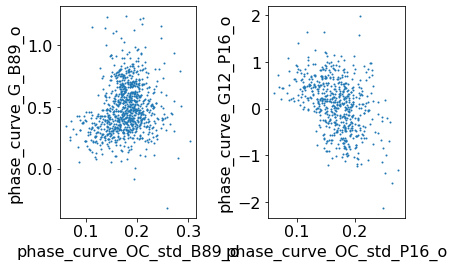

In [83]:
x_plot1 = "phase_curve_OC_std_B89_o"
y_plot1 = "phase_curve_G_B89_o"
x_plot2 = "phase_curve_OC_std_P16_o"
y_plot2 = "phase_curve_G12_P16_o"

df_plot1 = df_trojan_B89
df_plot2 = df_trojan_P16

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

ax1.scatter(df_plot1[x_plot1],df_plot1[y_plot1],s=1)

ax1.set_xlabel(x_plot1)
ax1.set_ylabel(y_plot1)

ax2.scatter(df_plot2[x_plot2],df_plot2[y_plot2],s=1)

ax2.set_xlabel(x_plot2)
ax2.set_ylabel(y_plot2)

plt.tight_layout()

# ax1.set_ylim(0,1)
# ax2.set_ylim(0,1)
# ax1.set_xlim(0,1)
# ax2.set_xlim(0,1)

In [84]:
df_trojan_B89[df_trojan_B89["phase_curve_OC_std_B89_o"]>0.25].sort_values("phase_curve_OC_std_B89_o")[[
    "name","mpc_number_1","phase_curve_N_fit_B89_o","phase_curve_OC_std_B89_o"]]

,name,mpc_number_1,phase_curve_N_fit_B89_o,phase_curve_OC_std_B89_o
253,1999 XY129,18058.0,250.0,0.250360
397,1999 RQ116,25347.0,337.0,0.250544
196,1999 RV165,13402.0,457.0,0.251341
300,1999 XR170,22035.0,266.0,0.252283
490,1999 XT213,36268.0,321.0,0.252546
518,1999 XP199,38596.0,132.0,0.254424
1084,2002 GU35,163256.0,200.0,0.257333
1069,2000 BK39,162388.0,259.0,0.257338
554,1997 TW28,39798.0,192.0,0.257893
487,1999 XM74,36259.0,315.0,0.259081


# Inspect L4 vs L5 clouds

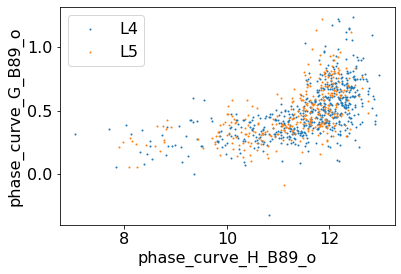

In [85]:
x_plot = "phase_curve_H_B89_o"
y_plot = "phase_curve_G_B89_o"

df_plot1=df_trojan_B89[df_trojan_B89["trojan_label"]=="L4"]
df_plot2=df_trojan_B89[df_trojan_B89["trojan_label"]=="L5"]

plt.scatter(df_plot1[x_plot],df_plot1[y_plot],s=1,label="L4")
plt.scatter(df_plot2[x_plot],df_plot2[y_plot],s=1,label="L5")

plt.xlabel(x_plot)
plt.ylabel(y_plot)

plt.legend()
# plt.ylim(-1,2)

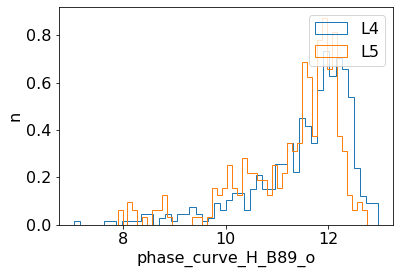

In [86]:
x_plot = "phase_curve_H_B89_o"

df_plot1=df_trojan_B89[df_trojan_B89["trojan_label"]=="L4"]
df_plot2=df_trojan_B89[df_trojan_B89["trojan_label"]=="L5"]

x=plt.hist(df_plot1[x_plot],histtype="step",bins=50,label="L4",density=True)
x=plt.hist(df_plot2[x_plot],histtype="step",bins=50,label="L5",density=True)

plt.xlabel(x_plot)
plt.ylabel("n")

plt.legend()

Slightly different abs mag distributions for L4 and L5, L4 has more smaller objects H>12. See Wong et al. 2014, McNeill et al. 2021.

Or is this just an observational bias? E.g. one cloud may be closer to the galactic plane and harder to observe

KstestResult(statistic=0.18214947064952733, pvalue=1.6676131366910596e-06)


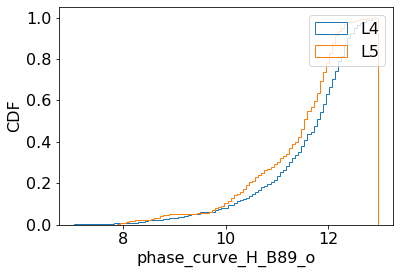

In [87]:
ks_check = "phase_curve_H_B89_o"

df_plot1=df_trojan_B89[df_trojan_B89["trojan_label"]=="L4"]
df_plot2=df_trojan_B89[df_trojan_B89["trojan_label"]=="L5"]

x1=df_plot1[ks_check]
x2=df_plot2[ks_check]

bins=np.linspace(np.amin([np.amin(x1),np.amin(x2)]),np.amax([np.amax(x1),np.amax(x2)]),100)
x=plt.hist(x1, density=True, cumulative=True, histtype='step',bins=bins,label="L4")
x=plt.hist(x2, density=True, cumulative=True, histtype='step',bins=bins,label="L5")
plt.xlabel(ks_check)
plt.ylabel("CDF")
plt.legend()

print(stats.ks_2samp(x1,x2))

Considering the H distribution for only the fits that are good in o and c, the difference between L4 and L5 is reduced.

There are fewer objects in L5 anyway, but now we are only looking at the brightest objects within both groups. We are less magnitude limited and the underlying H distributions are more similar

/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


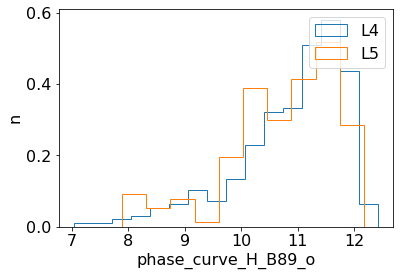

In [88]:
x_plot = "phase_curve_H_B89_o"

df_plot1 = df_trojan[(good_mask_B89_o & good_mask_B89_c)][df_trojan["trojan_label"]=="L4"]
df_plot2 = df_trojan[(good_mask_B89_o & good_mask_B89_c)][df_trojan["trojan_label"]=="L5"]

x=plt.hist(df_plot1[x_plot],histtype="step",bins="auto",label="L4",density=True)
x=plt.hist(df_plot2[x_plot],histtype="step",bins="auto",label="L5",density=True)

plt.xlabel(x_plot)
plt.ylabel("n")

plt.legend()

/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


KstestResult(statistic=0.11184926184926185, pvalue=0.11462989977505023)


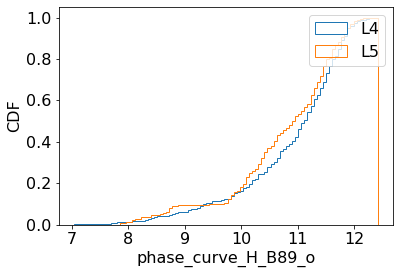

In [89]:
ks_check = "phase_curve_H_B89_o"

df_plot1 = df_trojan[(good_mask_B89_o & good_mask_B89_c)][df_trojan["trojan_label"]=="L4"]
df_plot2 = df_trojan[(good_mask_B89_o & good_mask_B89_c)][df_trojan["trojan_label"]=="L5"]

x1=df_plot1[ks_check]
x2=df_plot2[ks_check]

bins=np.linspace(np.amin([np.amin(x1),np.amin(x2)]),np.amax([np.amax(x1),np.amax(x2)]),100)
x=plt.hist(x1, density=True, cumulative=True, histtype='step',bins=bins,label="L4")
x=plt.hist(x2, density=True, cumulative=True, histtype='step',bins=bins,label="L5")
plt.xlabel(ks_check)
plt.ylabel("CDF")
plt.legend()

print(stats.ks_2samp(x1,x2))

563 329 892


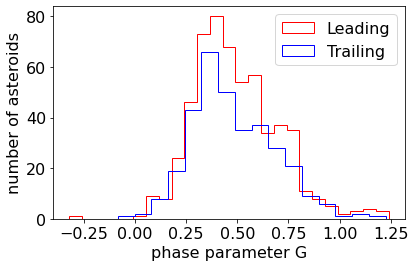

In [104]:
x_plot = "phase_curve_G_B89_o"

df_plot1=df_trojan_B89[df_trojan_B89["trojan_label"]=="L4"]
df_plot2=df_trojan_B89[df_trojan_B89["trojan_label"]=="L5"]
print(len(df_plot1),len(df_plot2),len(df_plot1)+len(df_plot2))

x=plt.hist(df_plot1[x_plot],histtype="step",bins="auto",label="Leading",color="r")#,density=True)
x=plt.hist(df_plot2[x_plot],histtype="step",bins="auto",label="Trailing",color="b")#,density=True)

# plt.xlabel(x_plot)
# plt.ylabel("PDF")
plt.xlabel("phase parameter G")
plt.ylabel("number of asteroids")

median1 = np.median(df_plot1[x_plot])
median2 = np.median(df_plot2[x_plot])

# plt.axvline(median1,c="r")
# plt.axvline(median2,c="b")

plt.legend()

plt.tight_layout()
plt.savefig("atlas_trojans_G.pdf",facecolor='white', transparent=False)

KstestResult(statistic=0.06267444810961685, pvalue=0.368920226401812)


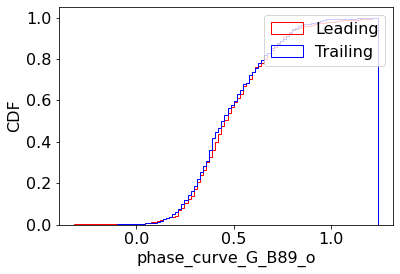

In [91]:
ks_check = "phase_curve_G_B89_o"

df_plot1=df_trojan_B89[df_trojan_B89["trojan_label"]=="L4"]
df_plot2=df_trojan_B89[df_trojan_B89["trojan_label"]=="L5"]

x1=df_plot1[ks_check]
x2=df_plot2[ks_check]

bins=np.linspace(np.amin([np.amin(x1),np.amin(x2)]),np.amax([np.amax(x1),np.amax(x2)]),100)
x=plt.hist(x1, density=True, cumulative=True, histtype='step',bins=bins,label="Leading",color="r")
x=plt.hist(x2, density=True, cumulative=True, histtype='step',bins=bins,label="Trailing",color="b")
plt.xlabel(ks_check)
plt.ylabel("CDF")
plt.legend()

print(stats.ks_2samp(x1,x2))

The distributions in G are very similar. This would be expected given the supposed common origin population and capture mechanisms for L4 and L5

# difference in colour for B89 between L4 and L5 groups

/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


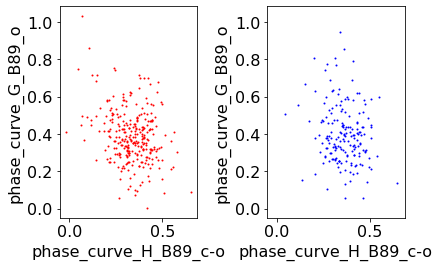

In [92]:
x_plot = "phase_curve_H_B89_c-o"
y_plot = "phase_curve_G_B89_o"

df_plot1 = df_trojan[(good_mask_B89_o & good_mask_B89_c)][df_trojan["trojan_label"]=="L4"]
df_plot2 = df_trojan[(good_mask_B89_o & good_mask_B89_c)][df_trojan["trojan_label"]=="L5"]

# # additional cut for only the brightest objects
# mag_cut=10
# df_plot1 = df_plot1[df_plot1[x_plot]<mag_cut]
# df_plot2 = df_plot2[df_plot2[x_plot]<mag_cut]

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1],sharex=ax1,sharey=ax1)

ax1.scatter(df_plot1[x_plot],df_plot1[y_plot],s=1,c="r")
# ax1.errorbar(df_plot1[x_plot],df_plot1[y_plot],
#              xerr=np.sqrt((df_plot1["phase_curve_H_err_B89_c"]**2.0) + (df_plot1["phase_curve_H_err_B89_o"]**2.0)),
#             yerr=df_plot1["phase_curve_G_err_B89_o"],
#             fmt=".")

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

ax2.scatter(df_plot2[x_plot],df_plot2[y_plot],s=1,c="b")
# ax2.errorbar(df_plot2[x_plot],df_plot2[y_plot],
#              xerr=np.sqrt((df_plot2["phase_curve_H_err_B89_c"]**2.0) + (df_plot2["phase_curve_H_err_B89_o"]**2.0)),
#             yerr=df_plot2["phase_curve_G_err_B89_o"],
#             fmt=".")

ax2.set_xlabel(x_plot)
ax2.set_ylabel(y_plot)

plt.tight_layout()

/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


286 180 466 1.5888888888888888
Hc-Ho (L4) = 0.3411999999999997+/-0.005929469228901477
Hc-Ho (L5) = 0.36079999999999934+/-0.006574088298225349


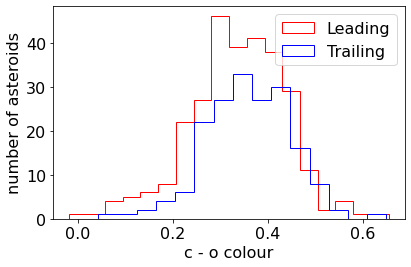

In [102]:
x_plot = "phase_curve_H_B89_c-o"

# df_plot1=df_trojan_B89[df_trojan_B89["trojan_label"]=="L4"]
# df_plot2=df_trojan_B89[df_trojan_B89["trojan_label"]=="L5"]
df_plot1 = df_trojan[(good_mask_B89_o & good_mask_B89_c)][df_trojan["trojan_label"]=="L4"]
df_plot2 = df_trojan[(good_mask_B89_o & good_mask_B89_c)][df_trojan["trojan_label"]=="L5"]

# # additional cut for only the brightest objects
# df_plot1 = df_plot1[df_plot1[x_plot]<mag_cut]
# df_plot2 = df_plot2[df_plot2[x_plot]<mag_cut]

print(len(df_plot1),len(df_plot2),len(df_plot1)+len(df_plot2),len(df_plot1)/len(df_plot2))

x=plt.hist(df_plot1[x_plot],histtype="step",bins="auto",label="Leading",color="r")#,density=True)
x=plt.hist(df_plot2[x_plot],histtype="step",bins="auto",label="Trailing",color="b")#,density=True)

plt.xlabel("c - o colour")
# plt.ylabel("PDF")
plt.ylabel("number of asteroids")

median1 = np.median(df_plot1[x_plot])
median2 = np.median(df_plot2[x_plot])

# plt.axvline(median1,c="r")
# plt.axvline(median2,c="b")

standard_error1 = np.std(df_plot1[x_plot])/np.sqrt(len(df_plot1[x_plot]))
standard_error2 = np.std(df_plot2[x_plot])/np.sqrt(len(df_plot2[x_plot]))

# sig=2.0 * 1.253 # including the factor for standard error of median, not mean
# alpha=0.2
# plt.axvspan(median1-(sig*standard_error1), median1+(sig*standard_error1), alpha=alpha, facecolor="r",edgecolor="none")
# plt.axvspan(median2-(sig*standard_error1), median2+(sig*standard_error1), alpha=alpha, facecolor="b",edgecolor="none")

print("Hc-Ho (L4) = {}+/-{}".format(median1,standard_error1))
print("Hc-Ho (L5) = {}+/-{}".format(median2,standard_error2))

plt.legend()

plt.tight_layout()
plt.savefig("atlas_trojans_c-o.pdf",facecolor='white', transparent=False)

/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


KstestResult(statistic=0.12552447552447552, pvalue=0.0552165475443015)


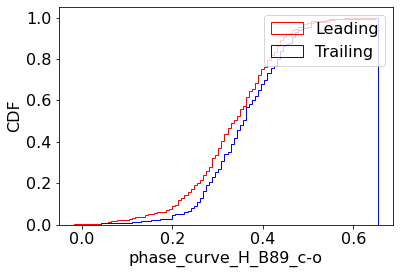

In [94]:
ks_check = "phase_curve_H_B89_c-o"

# df_plot1=df_trojan_B89[df_trojan_B89["trojan_label"]=="L4"]
# df_plot2=df_trojan_B89[df_trojan_B89["trojan_label"]=="L5"]
df_plot1 = df_trojan[(good_mask_B89_o & good_mask_B89_c)][df_trojan["trojan_label"]=="L4"]
df_plot2 = df_trojan[(good_mask_B89_o & good_mask_B89_c)][df_trojan["trojan_label"]=="L5"]

# # additional cut for only the brightest objects
# df_plot1 = df_plot1[df_plot1[x_plot]<mag_cut]
# df_plot2 = df_plot2[df_plot2[x_plot]<mag_cut]

x1=df_plot1[ks_check]
x2=df_plot2[ks_check]

bins=np.linspace(np.amin([np.amin(x1),np.amin(x2)]),np.amax([np.amax(x1),np.amax(x2)]),100)
x=plt.hist(x1, density=True, cumulative=True, histtype='step',bins=bins,label="Leading",color="r")
x=plt.hist(x2, density=True, cumulative=True, histtype='step',bins=bins,label="Trailing",color="b")
plt.xlabel(ks_check)
plt.ylabel("CDF")
plt.legend()

print(stats.ks_2samp(x1,x2))

When we consider colour it is important to only use the good quality fits in both o and c.

We see that there is a slight difference between c-o colours for the L4 and L5 swarms. There are more objects in L4 with a lower c-o colour than in L5, i.e. L4 is slightly bluer.

This is opposite to what was found by McNeill et al. 2021, which also presented evidence for a difference in colour distributions.

/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


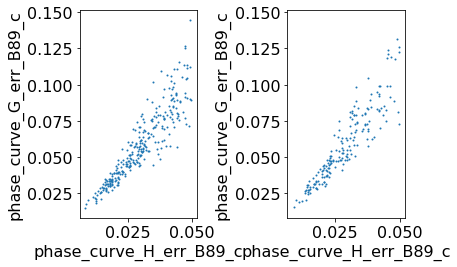

In [95]:
x_plot = "phase_curve_H_err_B89_c"
y_plot = "phase_curve_G_err_B89_c"

df_plot1 = df_trojan[(good_mask_B89_o & good_mask_B89_c)][df_trojan["trojan_label"]=="L4"]
df_plot2 = df_trojan[(good_mask_B89_o & good_mask_B89_c)][df_trojan["trojan_label"]=="L5"]

# # additional cut for only the brightest objects
# df_plot1 = df_plot1[df_plot1[x_plot]<mag_cut]
# df_plot2 = df_plot2[df_plot2[x_plot]<mag_cut]

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1],sharex=ax1,sharey=ax1)

ax1.scatter(df_plot1[x_plot],df_plot1[y_plot],s=1)

ax2.scatter(df_plot2[x_plot],df_plot2[y_plot],s=1)

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)
ax2.set_xlabel(x_plot)
ax2.set_ylabel(y_plot)

plt.tight_layout()

The errors are relatively similar for good fits in o&c in both the L4 and L5

# random sample and compare colour dists

100 100 200 1.0
Hc-Ho (L4) = 0.3333049999999993+/-0.008850264496702905
Hc-Ho (L5) = 0.3650349999999998+/-0.008660094960587892
KstestResult(statistic=0.2, pvalue=0.03638428787491733)


/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


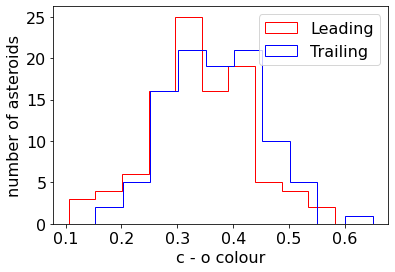

In [101]:
x_plot = "phase_curve_H_B89_c-o"
ks_check = "phase_curve_H_B89_c-o"

df_plot1 = df_trojan[(good_mask_B89_o & good_mask_B89_c)][df_trojan["trojan_label"]=="L4"]
df_plot2 = df_trojan[(good_mask_B89_o & good_mask_B89_c)][df_trojan["trojan_label"]=="L5"]

# # additional cut for only the brightest objects
# df_plot1 = df_plot1[df_plot1[x_plot]<mag_cut]
# df_plot2 = df_plot2[df_plot2[x_plot]<mag_cut]

# random sample
N=100
df_plot1 = df_plot1.sample(N)
df_plot2 = df_plot2.sample(N)

print(len(df_plot1),len(df_plot2),len(df_plot1)+len(df_plot2),len(df_plot1)/len(df_plot2))

x=plt.hist(df_plot1[x_plot],histtype="step",bins="auto",label="Leading",color="r")#,density=True)
x=plt.hist(df_plot2[x_plot],histtype="step",bins="auto",label="Trailing",color="b")#,density=True)

plt.xlabel("c - o colour")
plt.ylabel("number of asteroids")

median1 = np.median(df_plot1[x_plot])
median2 = np.median(df_plot2[x_plot])

# plt.axvline(median1,c="r")
# plt.axvline(median2,c="b")

standard_error1 = np.std(df_plot1[x_plot])/np.sqrt(len(df_plot1[x_plot]))
standard_error2 = np.std(df_plot2[x_plot])/np.sqrt(len(df_plot2[x_plot]))

# sig=2.0 * 1.253 # including the factor for standard error of median, not mean
# alpha=0.2
# plt.axvspan(median1-(sig*standard_error1), median1+(sig*standard_error1), alpha=alpha, facecolor="r",edgecolor="none")
# plt.axvspan(median2-(sig*standard_error1), median2+(sig*standard_error1), alpha=alpha, facecolor="b",edgecolor="none")

print("Hc-Ho (L4) = {}+/-{}".format(median1,standard_error1))
print("Hc-Ho (L5) = {}+/-{}".format(median2,standard_error2))

x1=df_plot1[ks_check]
x2=df_plot2[ks_check]
KS_results = stats.ks_2samp(x1,x2)
print(KS_results)

plt.legend()

/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'number')

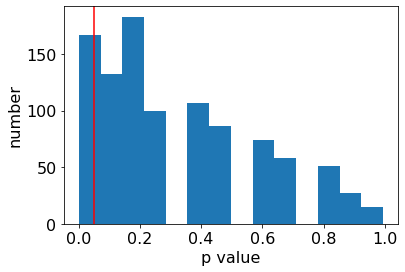

In [97]:
ks_check = "phase_curve_H_B89_c-o"
df_plot1 = df_trojan[(good_mask_B89_o & good_mask_B89_c)][df_trojan["trojan_label"]=="L4"]
df_plot2 = df_trojan[(good_mask_B89_o & good_mask_B89_c)][df_trojan["trojan_label"]=="L5"]

N=100
n=1000

p_vals = []
for i in range(n):
    # random sample
    df_KS1 = df_plot1.sample(N)
    df_KS2 = df_plot2.sample(N)

    x1=df_KS1[ks_check]
    x2=df_KS2[ks_check]
    KS_results = stats.ks_2samp(x1,x2)
#     print(KS_results)
    p_vals.append(KS_results[1])
    
x=plt.hist(p_vals,bins="auto")
plt.axvline(0.05,c="r")
plt.xlabel("p value")
plt.ylabel("number")

# L4/L5 colour difference for P16

149 98


/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


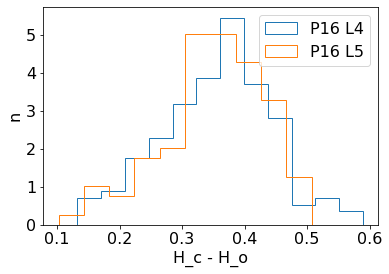

In [98]:
x_plot = "phase_curve_H_P16_c-o"

# df_plot1=df_trojan_P16[df_trojan_P16["trojan_label"]=="L4"]
# df_plot2=df_trojan_P16[df_trojan_P16["trojan_label"]=="L5"]
df_plot1 = df_trojan[(good_mask_P16_o & good_mask_P16_c)][df_trojan["trojan_label"]=="L4"]
df_plot2 = df_trojan[(good_mask_P16_o & good_mask_P16_c)][df_trojan["trojan_label"]=="L5"]
print(len(df_plot1),len(df_plot2))

x=plt.hist(df_plot1[x_plot],histtype="step",bins="auto",label="P16 L4",density=True)
x=plt.hist(df_plot2[x_plot],histtype="step",bins="auto",label="P16 L5",density=True)

plt.xlabel("H_c - H_o")
plt.ylabel("n")

plt.legend()

KstestResult(statistic=0.06951102588686481, pvalue=0.9118148141857355)


/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


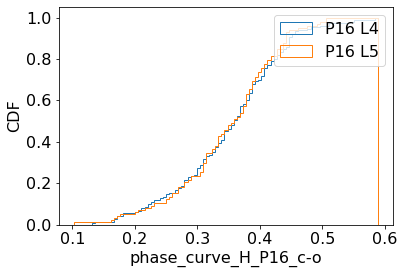

In [99]:
ks_check = "phase_curve_H_P16_c-o"

# df_plot1=df_trojan_P16[df_trojan_P16["trojan_label"]=="L4"]
# df_plot2=df_trojan_P16[df_trojan_P16["trojan_label"]=="L5"]
df_plot1 = df_trojan[(good_mask_P16_o & good_mask_P16_c)][df_trojan["trojan_label"]=="L4"]
df_plot2 = df_trojan[(good_mask_P16_o & good_mask_P16_c)][df_trojan["trojan_label"]=="L5"]

x1=df_plot1[ks_check]
x2=df_plot2[ks_check]

bins=np.linspace(np.amin([np.amin(x1),np.amin(x2)]),np.amax([np.amax(x1),np.amax(x2)]),100)
x=plt.hist(x1, density=True, cumulative=True, histtype='step',bins=bins,label="P16 L4")
x=plt.hist(x2, density=True, cumulative=True, histtype='step',bins=bins,label="P16 L5")
plt.xlabel(ks_check)
plt.ylabel("CDF")
plt.legend()

print(stats.ks_2samp(x1,x2))

There is no appreciable difference in the colour distribution for P16, but we have significantly fewer good fits than with B89

/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/jrobinson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


KstestResult(statistic=0.10786193672099713, pvalue=0.45622739009401614)


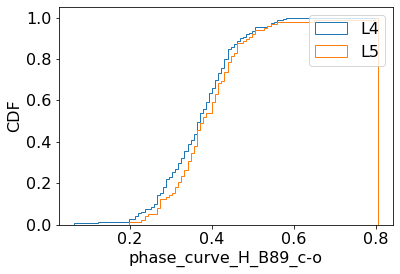

In [100]:
ks_check = "phase_curve_H_B89_c-o"

# df_plot1=df_trojan_P16[df_trojan_P16["trojan_label"]=="L4"]
# df_plot2=df_trojan_P16[df_trojan_P16["trojan_label"]=="L5"]
df_plot1 = df_trojan[(good_mask_P16_o & good_mask_P16_c)][df_trojan["trojan_label"]=="L4"]
df_plot2 = df_trojan[(good_mask_P16_o & good_mask_P16_c)][df_trojan["trojan_label"]=="L5"]

x1=df_plot1[ks_check]
x2=df_plot2[ks_check]

bins=np.linspace(np.amin([np.amin(x1),np.amin(x2)]),np.amax([np.amax(x1),np.amax(x2)]),100)
x=plt.hist(x1, density=True, cumulative=True, histtype='step',bins=bins,label="L4")
x=plt.hist(x2, density=True, cumulative=True, histtype='step',bins=bins,label="L5")
plt.xlabel(ks_check)
plt.ylabel("CDF")
plt.legend()

print(stats.ks_2samp(x1,x2))

When we consider the B89 fit for those P16 objects with good fits, the difference in colour distribution is greatly reduced. The objects that can be fit by B89 but not P16 are the ones that contribute the greatest colour difference between the L4 and L5 groups.

# cluster based on G and c-o together (and also albedo)?